<a href="https://colab.research.google.com/github/dkant000/ML_PROJECT/blob/master/%5BFIN_FIN%5D_C2077400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder() 
from sklearn.metrics import accuracy_score, confusion_matrix, \
                            classification_report, f1_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

from plotnine.data import economics
from pandas import DataFrame
from plotnine import ggplot, aes, geom_line
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [95]:
data = pd.read_csv('dataset.csv',index_col=None)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Descriptive Analysis

In [96]:
# description of Administrative, Informational, ProductRelated,ExitRates, PageValues, SpecialDay
data[['Administrative','Informational','ProductRelated','ExitRates','PageValues','SpecialDay']].describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468,0.043073,5.889258,0.061427
std,3.321784,1.270156,44.475503,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.014286,0.000000,0.000000
50%,1.000000,0.000000,18.000000,0.025156,0.000000,0.000000
75%,4.000000,0.000000,38.000000,0.050000,0.000000,0.000000
max,27.000000,24.000000,705.000000,0.200000,361.763742,1.000000


In [97]:
# description of Month, OperatingSystems, Browser, Region, TrafficType
data[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']].describe()

,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.124006,2.357097,3.147364,4.069586
std,0.911325,1.717277,2.401591,4.025169
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.000000,3.000000,2.000000
75%,3.000000,2.000000,4.000000,4.000000
max,8.000000,13.000000,9.000000,20.000000


In [98]:
# data.info()
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [99]:
# Month is a categorical variable , so converting them using label encoding 

# data['Month']= label_encoder.fit_transform(data['Month']) 
# data['OperatingSystems'] = data['OperatingSystems'].astype('category')
# data['Browser'] = data['Browser'].astype('category')
data['Browser']=data['Browser'].astype('int')
data['OperatingSystems']=data['OperatingSystems'].astype('int')
# Weekend and Revenue feature is of type bool, so converting that into integer 
data['Weekend'] = data['Weekend'].astype(np.int)
data['Revenue'] = data['Revenue'].astype(np.int)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


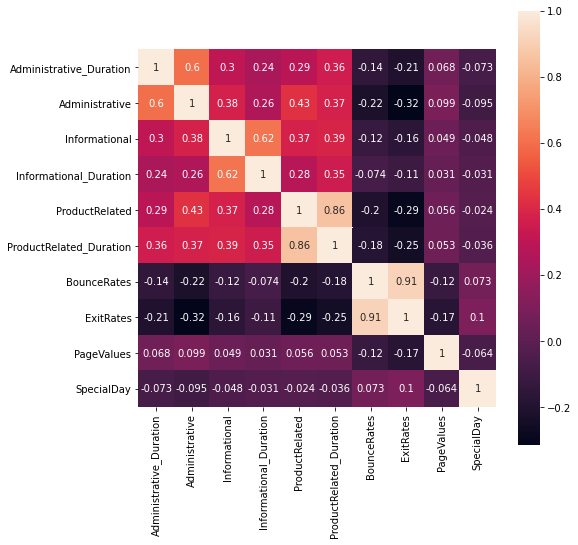

In [100]:
# coorellation between numerical features of dataset 

f,ax=plt.subplots(figsize=(8,8))
correlation=data[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']].corr()
sns.heatmap(correlation,annot=True,square=True)


In [101]:
# From above coorelation, the attributes Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates
# can be removed as they have very high coorelation between them

data = data.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates'],axis=1)


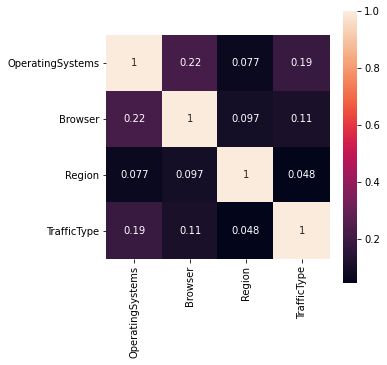

In [102]:
# coorellation between categorical features of dataset 

f,ax=plt.subplots(figsize=(5,5))
correlation=data[['OperatingSystems','Browser','Region','TrafficType']].corr()
sns.heatmap(correlation,annot=True,square=True)

# Exploratory Data Analysis [EDA] 



### *Univariate Data Analysis*



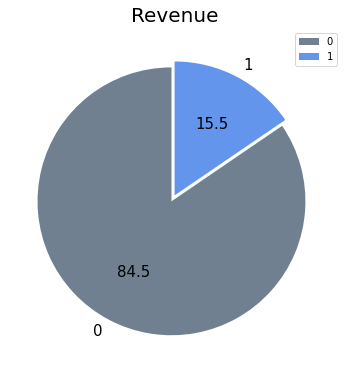

In [103]:
# Plotting a pie chart for Revenue
# Shows imbalanced data
plt.figure(figsize=(6,7))
data['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.05,0),colors=['slategray','cornflowerblue'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()

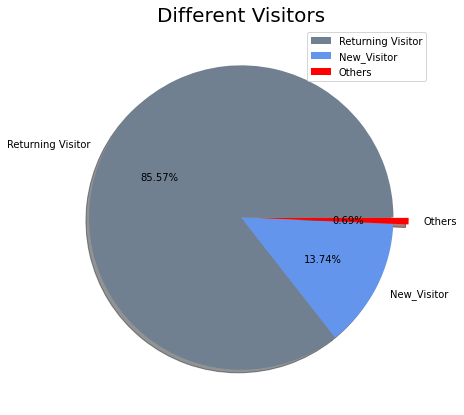

In [104]:
# plotting a pie chart for Visitors
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['slategray','cornflowerblue','red']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.axis('off')
plt.legend()

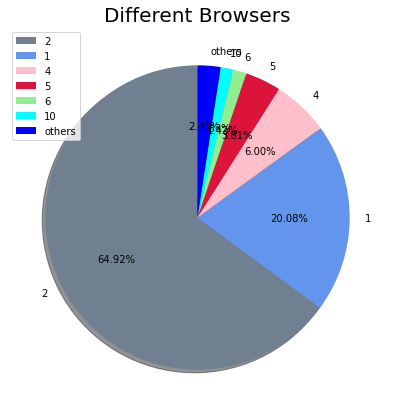

In [105]:
# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

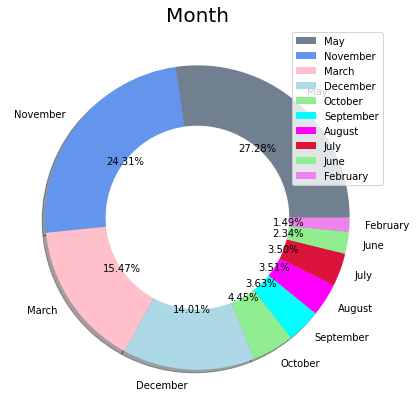

In [106]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['slategray', 'cornflowerblue', 'pink', 'lightblue', 'lightgreen', 'cyan', 'magenta', 'crimson', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [107]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

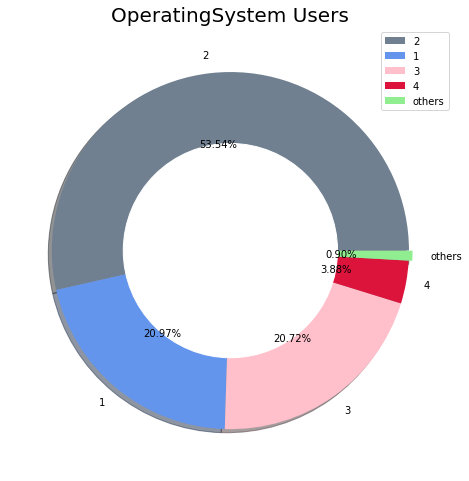

In [108]:
# plotting a pie chart for different number of OperatingSystems users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0.02]

circle = plt.Circle((0, 0), 0.6, color = 'white')
# plt.subplot(1, 2, 1)
plt.figure(figsize=(8,12))
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OperatingSystem Users', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()


###  *Bivariate Data Analysis*



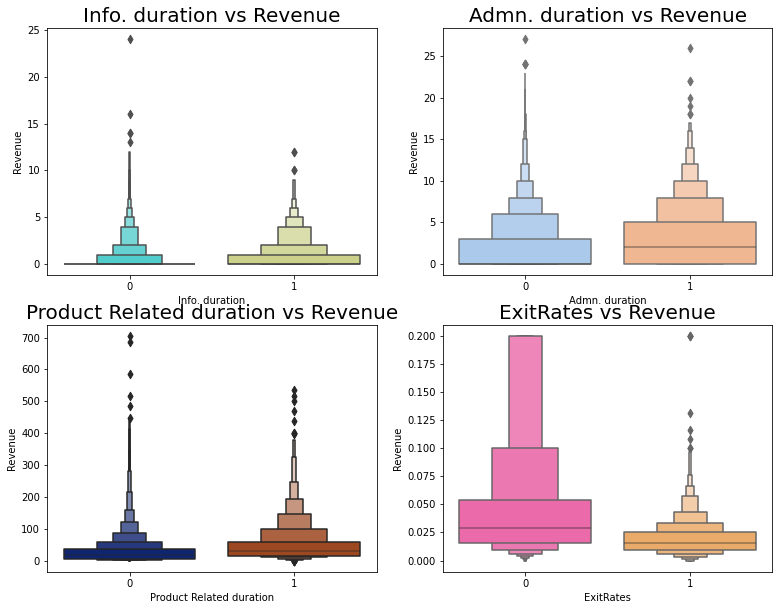

In [109]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (13, 10)

plt.subplot(2, 2, 1)
sns.boxenplot(data['Revenue'], data['Informational'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 20)
plt.xlabel('Info. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(data['Revenue'], data['Administrative'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 20)
plt.xlabel('Admn. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(data['Revenue'], data['ProductRelated'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 20)
plt.xlabel('Product Related duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('ExitRates', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)
plt.show()

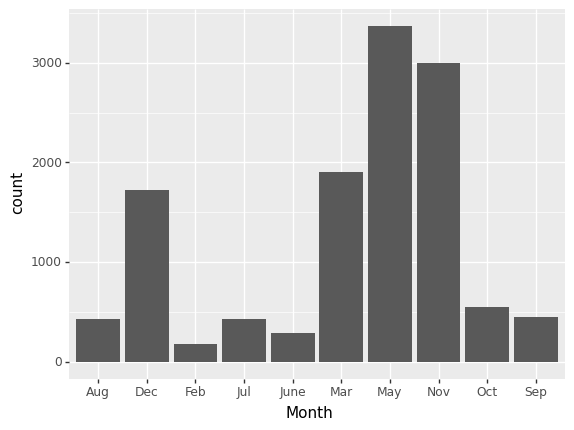

<ggplot: (8793875283334)>

In [110]:
ggplot(data, aes(x='Month', fill = 'Revenue')) + \
    geom_bar(stat = 'count')

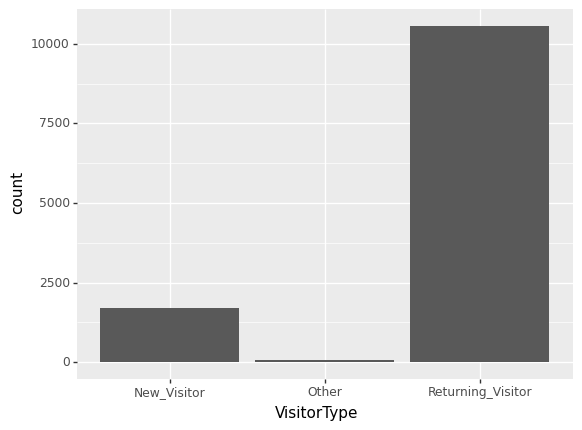

<ggplot: (-9223363242969382768)>

In [111]:

ggplot(data, aes(x='VisitorType', fill = 'Revenue')) + \
    geom_bar(stat = 'count', )

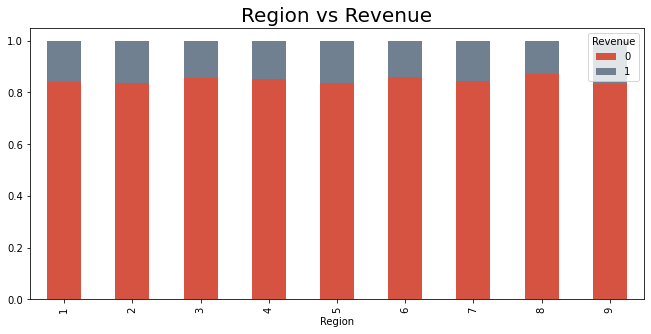

In [112]:
# f,ax=plt.subplots(figsize=(8,8))
data1 = pd.crosstab(data['Region'], data['Revenue'])
data1.div(data1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (11, 5),color=['#D75341','slategray'])
plt.title('Region vs Revenue', fontsize = 20)
plt.show()

,month,revenue_true,revenue_false,Percent_true
1,Aug,76,357,21.2885
2,Dec,216,1511,14.2952
3,Feb,3,181,1.65746
4,Jul,66,366,18.0328
5,June,29,259,11.1969
6,Mar,192,1715,11.1953
7,May,365,2999,12.1707
8,Nov,760,2238,33.9589
9,Oct,115,434,26.4977
10,Sep,86,362,23.7569


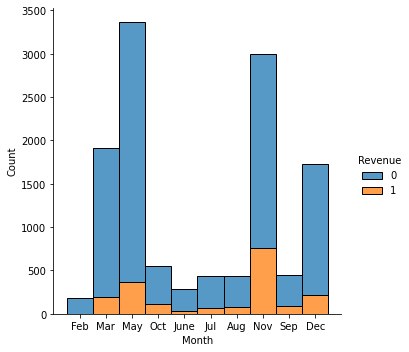

In [113]:
counts=[]
count_false = []
x = list(data['Revenue'])
y=list(data['Month'])
new_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep']
month_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep','total']
 
new_list[0]
for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j] and x[i]==1:
      count+=1
      # print(count)
  counts.append(count)
  X=(count)

for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
   if y[i]==new_list[j] and x[i]==0:
     count+=1
  count_false.append(count)
  X=(count)
 
ratio_list =[] 
ratio = 0
 
for i in range(len(new_list)):
  ratio = counts[i]/count_false[i]
  ratio = ratio*100
  ratio_list.append(ratio)
 
total_true = 0
total_false = 0
for i in range(0, len(counts)):
 total_true = total_true + counts[i]
# print(total_true)
 
for i in range(0, len(count_false)):
 total_false = total_false + count_false[i]
# print(total_false)
 
counts.append(total_true)
count_false.append(total_false)
ratio_list.append('')
New_list_DataFrame=DataFrame(month_list,columns=["month"],index=[1,2,3,4,5,6,7,8,9,10,11])
DATA=DataFrame(counts,columns=["revenue_true"],index=[1,2,3,4,5,6,7,8,9,10,11])
DATA_false=DataFrame(count_false,columns=["revenue_false"],index=[1,2,3,4,5,6,7,8,9,10,11])
ratio_col = DataFrame(ratio_list,columns=["Percent_true"],index=[1,2,3,4,5,6,7,8,9,10,11])
Data_con=pd.concat([New_list_DataFrame,DATA,DATA_false,ratio_col],axis="columns")
# (Data_con.style.format('${0:,.2f}')
display(Data_con)
# print(tabulate(Data_con, headers = 'keys', tablefmt = 'psql'))
 
print('\n')
sns.displot(data, x="Month", hue="Revenue" ,multiple = "stack")

In [114]:
data['Month']

0        Feb
1        Feb
2        Feb
3        Feb
4        Feb
        ... 
12325    Dec
12326    Nov
12327    Nov
12328    Nov
12329    Nov
Name: Month, Length: 12330, dtype: object

In [115]:
# month label encoded
data['Month']= label_encoder.fit_transform(data['Month']) 

# Data Pre-processing

In [116]:
# Spliting the dataset into 2 forms, one with revenue and other with rest 
y = data['Revenue']
x = data.drop('Revenue',axis=1)


In [117]:
x

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,1,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,0
1,0,0,2,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,0
2,0,0,1,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,0
3,0,0,2,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,0
4,0,0,10,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,0.0,1,4,6,1,1,Returning_Visitor,1
12326,0,0,5,0.021333,0.000000,0.0,7,3,2,1,8,Returning_Visitor,1
12327,0,0,6,0.086667,0.000000,0.0,7,3,2,1,13,Returning_Visitor,1
12328,4,0,15,0.021053,0.000000,0.0,7,2,2,3,11,Returning_Visitor,0


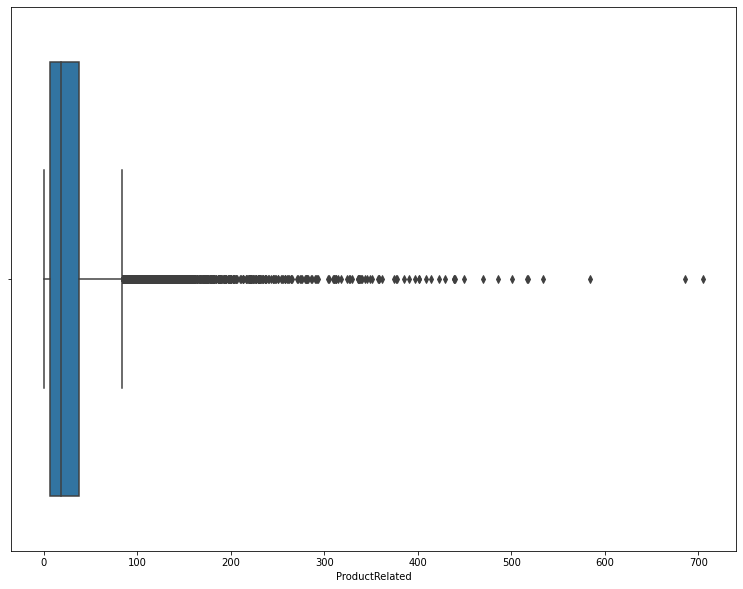

In [118]:
# outliers
# sns.boxplot(x=data['Administrative'])
sns.boxplot(x=data['ProductRelated'])
# sns.boxplot(x=data['ExitRates'])
# sns.boxplot(x=data['TrafficType'])

In [119]:
# Use get_dummies to split attribute VisitorType into different features
x = pd.get_dummies(x)
x # dataframe after splitting using dummies


,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0,1
1,0,0,2,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0,1
2,0,0,1,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0,1
3,0,0,2,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0,1
4,0,0,10,0.050000,0.000000,0.0,2,3,3,1,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,0.0,1,4,6,1,1,1,0,0,1
12326,0,0,5,0.021333,0.000000,0.0,7,3,2,1,8,1,0,0,1
12327,0,0,6,0.086667,0.000000,0.0,7,3,2,1,13,1,0,0,1
12328,4,0,15,0.021053,0.000000,0.0,7,2,2,3,11,0,0,0,1




### *Scalling*



In [120]:
# min max scale

cols_to_scale = ['Administrative',
 'Informational',
 'ProductRelated',
 'ExitRates',
 'PageValues',
 'SpecialDay',]
# from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [121]:
# Now, remove attribute VisitorType_Other as it will not affect our dataset

# x = x.drop(['VisitorType_Other'], axis=1)


# Model Fitting




### ***SMOTE***



In [122]:
#define COnfusion matrix

def ConfusionMatrix(A,B):
  CM=confusion_matrix(A, B)
  plt.figure(figsize=(5,4))
  fig, ax = plot_confusion_matrix(CM,show_absolute=True,show_normed=True,colorbar=True)
  plt.show()

In [123]:
from imblearn.over_sampling import SMOTE
print("shape of x before",x.shape)
print("shape of y before",y.shape)
smote = SMOTE(sampling_strategy='minority');
x_smote, y_smote = smote.fit_sample(x,y);
print("Shape of x_smote :", x_smote.shape)
print("Shape of y_smote :", y_smote.shape)


shape of x before (12330, 15)
shape of y before (12330,)
Shape of x_smote : (20844, 15)
Shape of y_smote : (20844,)


In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.30)
print("x_train Shape :", x_train.shape)
print("x_test Shape :", x_test.shape)
print("y_train Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)
# print(x_smote.shape)
# print(y_smote.shape)

x_train Shape : (14590, 15)
x_test Shape : (6254, 15)
y_train Shape : (14590,)
y_test Shape : (6254,)


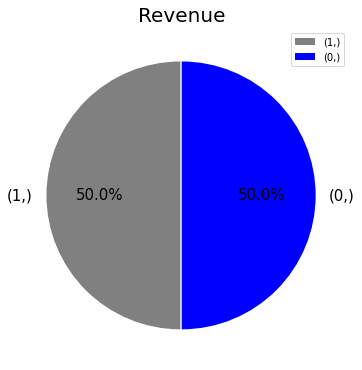

In [125]:
# Plotting a pie chart for Revenue after balancing the dataset
 
list_Revenue=pd.DataFrame(y_smote)
plt.figure(figsize=(6,7))
list_Revenue.value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 15},startangle=90,explode =(0.01,0),colors=['grey','blue'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()



### ***1. Random Forest***



Training Accuracy : 0.9233721727210418
Testing Accuracy : 0.9152542372881356
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3113
           1       0.91      0.92      0.92      3141

    accuracy                           0.92      6254
   macro avg       0.92      0.92      0.92      6254
weighted avg       0.92      0.92      0.92      6254



<Figure size 360x288 with 0 Axes>

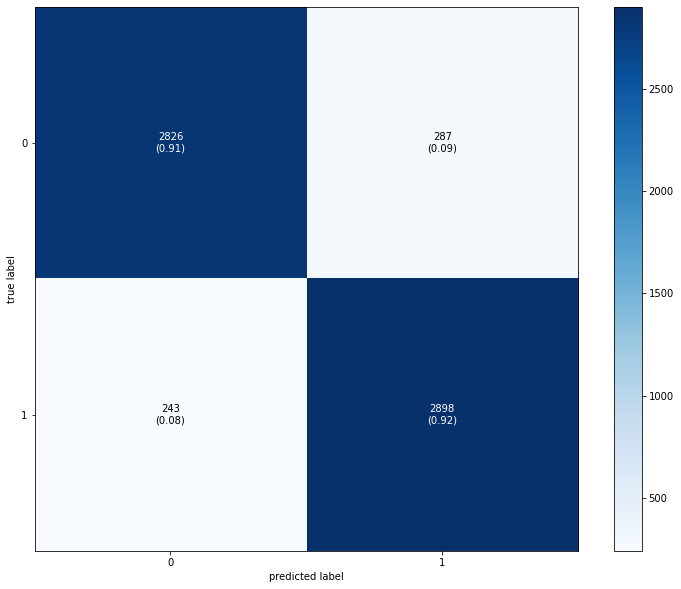

In [126]:
# Creating Random Forest Classifier

model = RandomForestClassifier(min_samples_leaf=20,min_samples_split=5,random_state=100)
model.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

ConfusionMatrix(y_test,y_pred)

In [127]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=100), {
    'min_samples_leaf': [20,25,30,35],
    'min_samples_split': [5,10,15,20]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
# clf.cv_results_
model_data=pd.DataFrame(clf.cv_results_)
print(model_data[['param_min_samples_leaf','param_min_samples_split','mean_test_score']])

print('the best score is : ',clf.best_score_)
print('The best fitted parameters for decision tree classifier is :',clf.best_params_)

   param_min_samples_leaf param_min_samples_split  mean_test_score
0                      20                       5         0.961624
1                      20                      10         0.961624
2                      20                      15         0.961624
3                      20                      20         0.961624
4                      25                       5         0.960025
5                      25                      10         0.960025
6                      25                      15         0.960025
7                      25                      20         0.960025
8                      30                       5         0.956028
9                      30                      10         0.956028
10                     30                      15         0.956028
11                     30                      20         0.956028
12                     35                       5         0.956507
13                     35                      10         0.95

<Figure size 936x720 with 0 Axes>

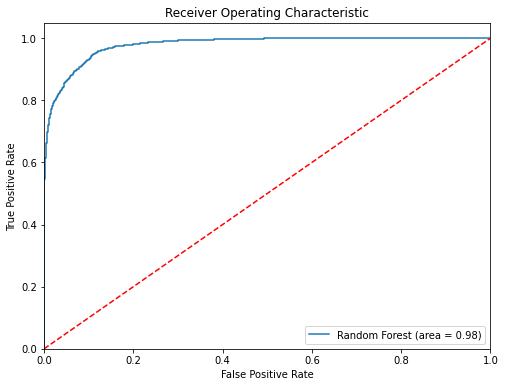

In [128]:
# ROC CURVE FOR RANDOM FOREST

rf_roc_auc = roc_auc_score(y_test, y_pred)
fpr2, tpr2, thresolds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(8,6))
plt.plot(fpr2, tpr2, label = 'Random Forest (area = %0.2f)' % roc_auc2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest ROC')
plt.show()





### ***2. Decision Tree***



Training Accuracy : 0.9279643591501028
Testing Accuracy : 0.9117364886472658
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3113
           1       0.92      0.90      0.91      3141

    accuracy                           0.91      6254
   macro avg       0.91      0.91      0.91      6254
weighted avg       0.91      0.91      0.91      6254



<Figure size 360x288 with 0 Axes>

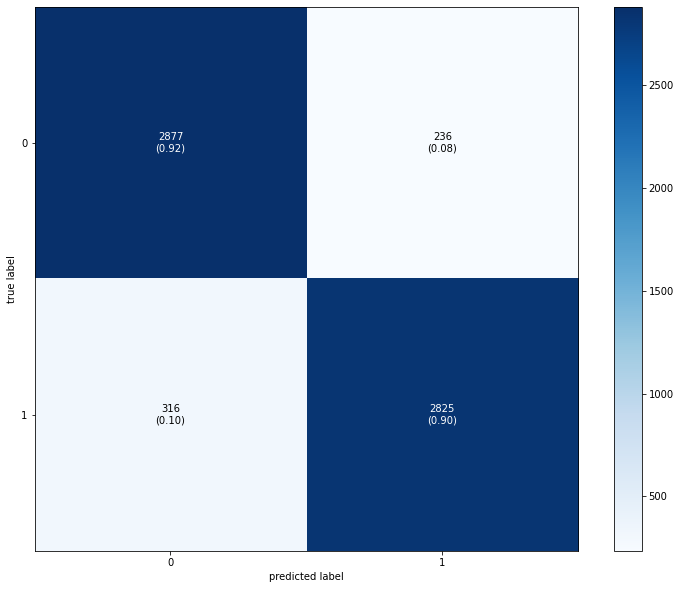

In [129]:
# Creating Decision Tree Classifier

DTC = DecisionTreeClassifier(min_samples_leaf=20,min_samples_split=5,random_state=75,)
DTC.fit(x_train, y_train)
# Predicting dataset response
y_pred=DTC.predict(x_test)
# Evaluate and display Training and Testing Acvuracy
print("Training Accuracy :", DTC.score(x_train, y_train))
print("Testing Accuracy :", DTC.score(x_test, y_test))
# Display Classification Report
print(classification_report(y_test, y_pred))
# Confusion matrix call
ConfusionMatrix(y_test,y_pred)

In [130]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_leaf': [20,25,30,],
    'min_samples_split': [5,10,15,],
    'random_state':[50,75,100,125,]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred)
model_data=pd.DataFrame(clf.cv_results_)
print(model_data[['param_min_samples_leaf','param_min_samples_split','param_random_state','mean_test_score']])

print('the best score is : ',clf.best_score_)
print('The best fitted parameters for decision tree classifier is :',clf.best_params_)

   param_min_samples_leaf  ... mean_test_score
0                      20  ...        0.923568
1                      20  ...        0.923568
2                      20  ...        0.923568
3                      20  ...        0.923568
4                      20  ...        0.923568
5                      20  ...        0.923568
6                      20  ...        0.923568
7                      20  ...        0.923568
8                      20  ...        0.923568
9                      20  ...        0.923568
10                     20  ...        0.923568
11                     20  ...        0.923568
12                     25  ...        0.923568
13                     25  ...        0.923568
14                     25  ...        0.923568
15                     25  ...        0.923568
16                     25  ...        0.923568
17                     25  ...        0.923568
18                     25  ...        0.923568
19                     25  ...        0.923568
20           



### ***3. KNN***



Training Accuracy : 0.9427690198766279
Testing Accuracy : 0.9023025263831148
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      3113
           1       0.85      0.98      0.91      3141

    accuracy                           0.90      6254
   macro avg       0.91      0.90      0.90      6254
weighted avg       0.91      0.90      0.90      6254



<Figure size 360x288 with 0 Axes>

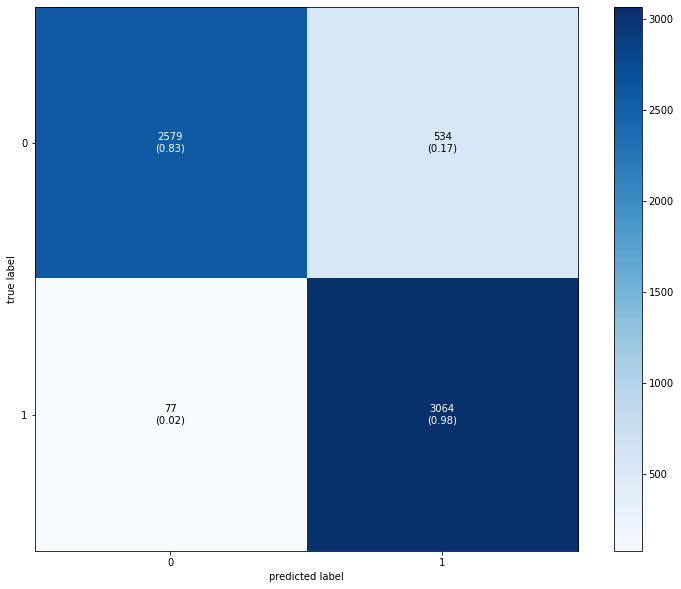

In [131]:
#CreatING KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 3, weights='uniform')
knn.fit(x_train, y_train)
# Predicting dataset response
y_pred = knn.predict(x_test)
# Evaluate and display Training and Testing Acvuracy
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_test, y_test))
confusion_matrix(y_test,y_pred)
# Display Classification Report
print(classification_report(y_test,y_pred))
# Confusion matrix call
ConfusionMatrix(y_test,y_pred)

In [132]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train, y_train)

print ('Best score = ',grid.best_score_)
print ('Best parameters are = ',grid.best_params_)
print ('Best estimator is = ',grid.best_estimator_)

Best score =  0.9163125428375599
Best parameters are =  {'n_neighbors': 1, 'weights': 'uniform'}
Best estimator is =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')




### ***4. LOGISTIC*** ***REGRESSION*** 



In [133]:
# Model Training

logis=LogisticRegression(random_state = 50, max_iter = 5000,penalty= 'l2', solver= 'newton-cg',C= 10)
lr = logis.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [134]:
# # Model Evaluation
# m = confusion_matrix(y_test,y_pred_lr)
# print("Logistic Regression:")
# print("Accuracy: ", (m[0][0] + m[1][1]) / (m[0][0] + m[0][1] + m[1][0] + m[1][1]))
# print(classification_report(y_test,y_pred_lr))
# # print("Testing Accuracy :", logreg.score(x_test, y_test))

Training Accuracy : 0.8198080877313229
Testing Accuracy : 0.8180364566677326
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      3113
           1       0.88      0.74      0.80      3141

    accuracy                           0.82      6254
   macro avg       0.83      0.82      0.82      6254
weighted avg       0.83      0.82      0.82      6254



<Figure size 360x288 with 0 Axes>

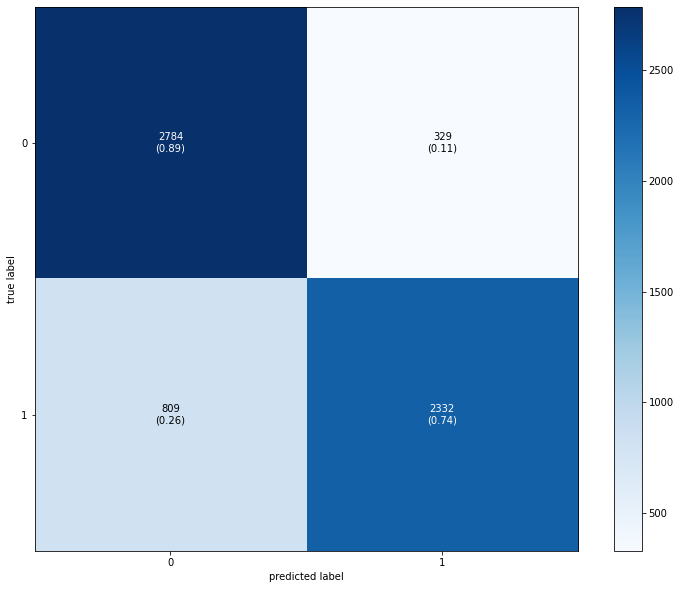

In [135]:
logreg=LogisticRegression(solver='liblinear',multi_class='auto',random_state = 50, max_iter = 5000,penalty= 'l2',C= 10)
# logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
# evaluating the model
print("Training Accuracy :", logreg.score(x_train, y_train))
print("Testing Accuracy :", logreg.score(x_test, y_test))
# classification report
# confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
ConfusionMatrix(y_test,y_pred)

In [136]:
# Apply HYPERPARAMETER TUNNING {GridSearchCV} TO FIND BEST RESULT PARAMETERS

from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear',]
penalty = ['l2','l5']
c_values = [10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820242 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.819694 (0.010177) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.817226 (0.009486) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.819717 (0.010007) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l5', 'solver': 'liblinear'}
0.820219 (0.009801) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.816427 (0.009446) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820242 (0.009894) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l5', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l5', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l5', 'solver': 'liblinear'}
0.817318 (0.009528) with: 

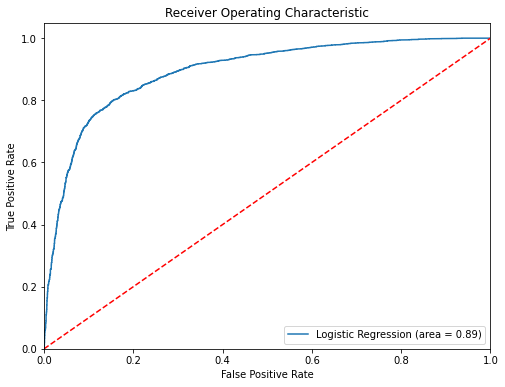

In [137]:
# ROC and AOC Curves of LOGISTIC REGRESSION
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr1, tpr1, thresolds1 = roc_curve(y_test, logis.predict_proba(x_test)[:,1])
plt.figure(figsize=(8,6))
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label = 'Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Logis ROC')
plt.show()



### ***5. SVM***





Training Accuracy : 0.8286497601096642
Testing Accuracy : 0.8249120562839782
              precision    recall  f1-score   support

           0       0.79      0.89      0.83      3113
           1       0.87      0.76      0.81      3141

    accuracy                           0.82      6254
   macro avg       0.83      0.83      0.82      6254
weighted avg       0.83      0.82      0.82      6254



<Figure size 360x288 with 0 Axes>

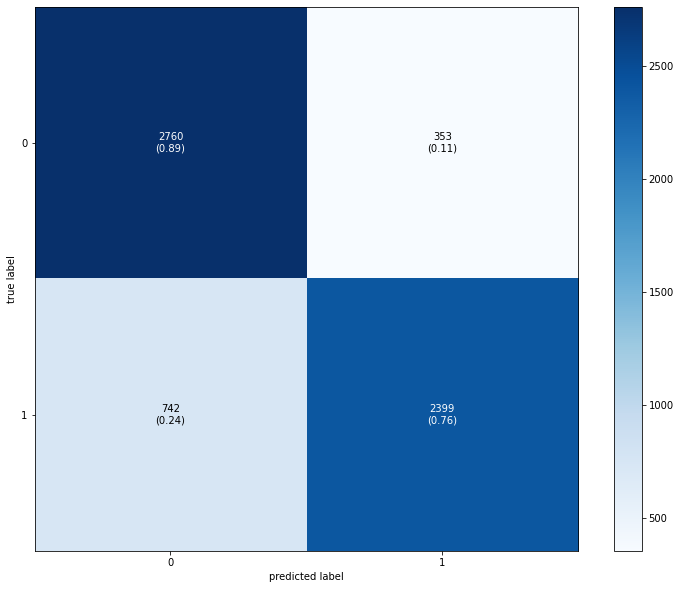

In [138]:
# svclassifier=SVC(kernel='linear') # not so good
# ker = ['linera','rbf','poly','sigmoid']
svclassifier=SVC(kernel='rbf',C=0.8, gamma= 0.0001, probability=True) # good output
# svclassifier=SVC(kernel='poly') # bad

# svclassifier=SVC(kernel='sigmoid') # worse
svclassifier.fit(x_train,y_train)

y_predict=svclassifier.predict(x_test)

# evaluating the model
print("Training Accuracy :", svclassifier.score(x_train, y_train))
print("Testing Accuracy :", svclassifier.score(x_test, y_test))

# eveluate confusion matrix
print(classification_report(y_test,y_predict))

# confusion matrix
ConfusionMatrix(y_test,y_predict)

In [ ]:
# CHECKING ALL KERNAL FOR BEST CLASSIFIER 
ker = ['linear','rbf','poly','sigmoid']
for i in ker:
  svclassifier=SVC(kernel=i,gamma= 0.0001, probability=True)
# svclassifier=SVC(kernel='sigmoid') # worse
  svclassifier.fit(x_train,y_train)

  y_predict=svclassifier.predict(x_test)

# evaluating the model
  print("kernal :",i)
  print("Training Accuracy of :", svclassifier.score(x_train, y_train))
  print("Testing Accuracy :", svclassifier.score(x_test, y_test))

# eveluate confusion matrix
  print(classification_report(y_test,y_predict))

# confusion matrix
  ConfusionMatrix(y_test,y_predict)

In [ ]:
# ROC of SVM
svm_roc_auc = roc_auc_score(y_test, y_predict)
fpr3, tpr3, thresolds3 = roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])
plt.figure()
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label = 'SVM (area = %0.2f)' % roc_auc3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM ROC')
plt.show()

## ***Comparision of ROC curves of all models***

In [ ]:
Font={'size':12, 'family':'Times New Roman'}
plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, 'b', label = 'Logistic Reg. = %0.2f' % roc_auc1, color='g')
plt.plot(fpr2, tpr2, 'b', label = 'Random Forest = %0.2f' % roc_auc2, color='r')
plt.plot(fpr3, tpr3, 'b', label = 'SVM = %0.2f' % roc_auc3, color='b')
plt.legend(loc = 'lower right', prop=Font)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate', Font)
plt.xlabel('False Positive Rate', Font)
plt.tick_params(labelsize=15)
plt.show()
best_score = abs(fpr1 - tpr1).max(),abs(fpr2 - tpr2).max(),abs(fpr3 - tpr3).max()
print("The ROC of each model is: ")
print("Logistic Regression, Random Forest, SVM")
print(best_score)

# **Conclusion**

In [ ]:
//vf
model_params = {
    'svm': {
        'model': SVC(kernel='rbf', C=0.8, gamma= 0.0001, probability=True),
        'params' : {
            'C': [1,10,15,20,25],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'min_samples_leaf': [20,25,30,35,40,45,50,55,60],
            'min_samples_split': [5,10,15,20,25,30,35],
            'random_state':[100,200,300]

        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,15,20]
        }
    },
    'Decision Tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'min_samples_leaf': [20,25,30,35,40,45,50,55,60],
            'min_samples_split': [5,10,15,20,25,30,35],
            'random_state':[100,200,300]
        }
    }
    
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_test,y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dff = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dff